# **DATA SOURCE**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from google.colab import files
uploaded = files.upload()

In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

# **VARIABLES AND FEATURES**

In [ ]:
df=pd.read_csv('Crop_recommendation.csv')
fg=df.head()
print(fg)

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [ ]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [ ]:
print(df.size)
print(df.shape)

17600
(2200, 8)


In [ ]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
dft1=df.copy()
label_encoder_x=LabelEncoder()
dft1 ['label']=label_encoder_x.fit_transform(dft1['label'].values)
print(dft1)

        N   P   K  temperature   humidity        ph    rainfall  label
0      90  42  43    20.879744  82.002744  6.502985  202.935536     20
1      85  58  41    21.770462  80.319644  7.038096  226.655537     20
2      60  55  44    23.004459  82.320763  7.840207  263.964248     20
3      74  35  40    26.491096  80.158363  6.980401  242.864034     20
4      78  42  42    20.130175  81.604873  7.628473  262.717340     20
...   ...  ..  ..          ...        ...       ...         ...    ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507      5
2196   99  15  27    27.417112  56.636362  6.086922  127.924610      5
2197  118  33  30    24.131797  67.225123  6.362608  173.322839      5
2198  117  32  34    26.272418  52.127394  6.758793  127.175293      5
2199  104  18  30    23.603016  60.396475  6.779833  140.937041      5

[2200 rows x 8 columns]


In [ ]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
dfs = dft1.copy()
col_names = ['N','P','K','temperature','humidity','ph','rainfall']
features = dfs[col_names]
print(features)

        N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]


In [ ]:
df.dtypes


N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [ ]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

# **VISUALIZATION**

<ipython-input-17-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

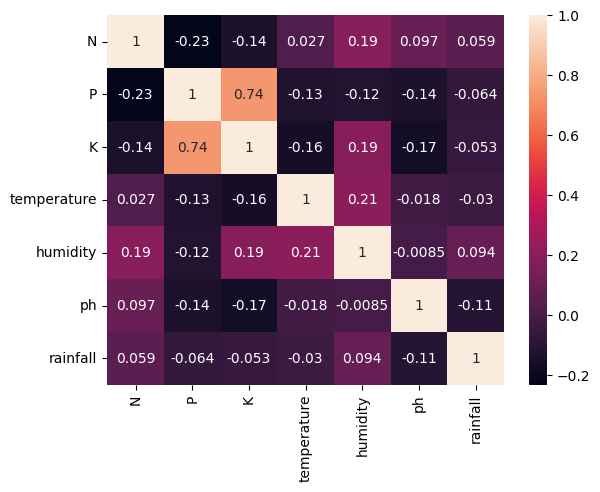

In [ ]:
sns.heatmap(df.corr(),annot=True)

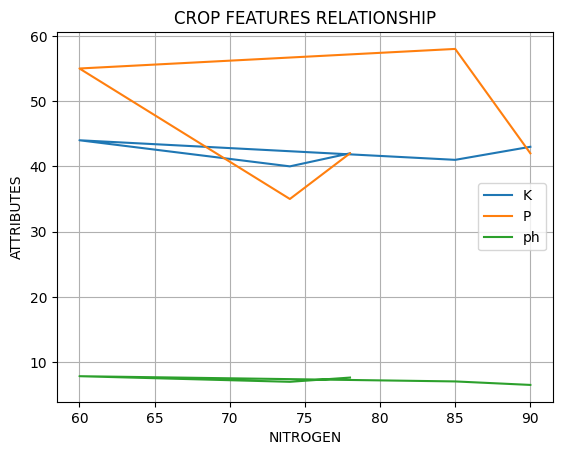

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fg['N'], fg['K'], label='K')
plt.plot(fg['N'], fg['P'], label='P')
plt.plot(fg['N'], fg['ph'], label='ph')
plt.xlabel('NITROGEN')
plt.ylabel('ATTRIBUTES')
plt.title('CROP FEATURES RELATIONSHIP')
plt.grid(True)
plt.legend()

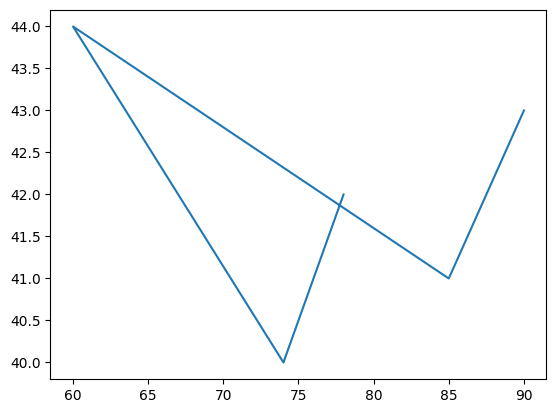

In [ ]:
plt.plot(fg['N'],fg['K'],label='K')

In [ ]:
df1=df.head()

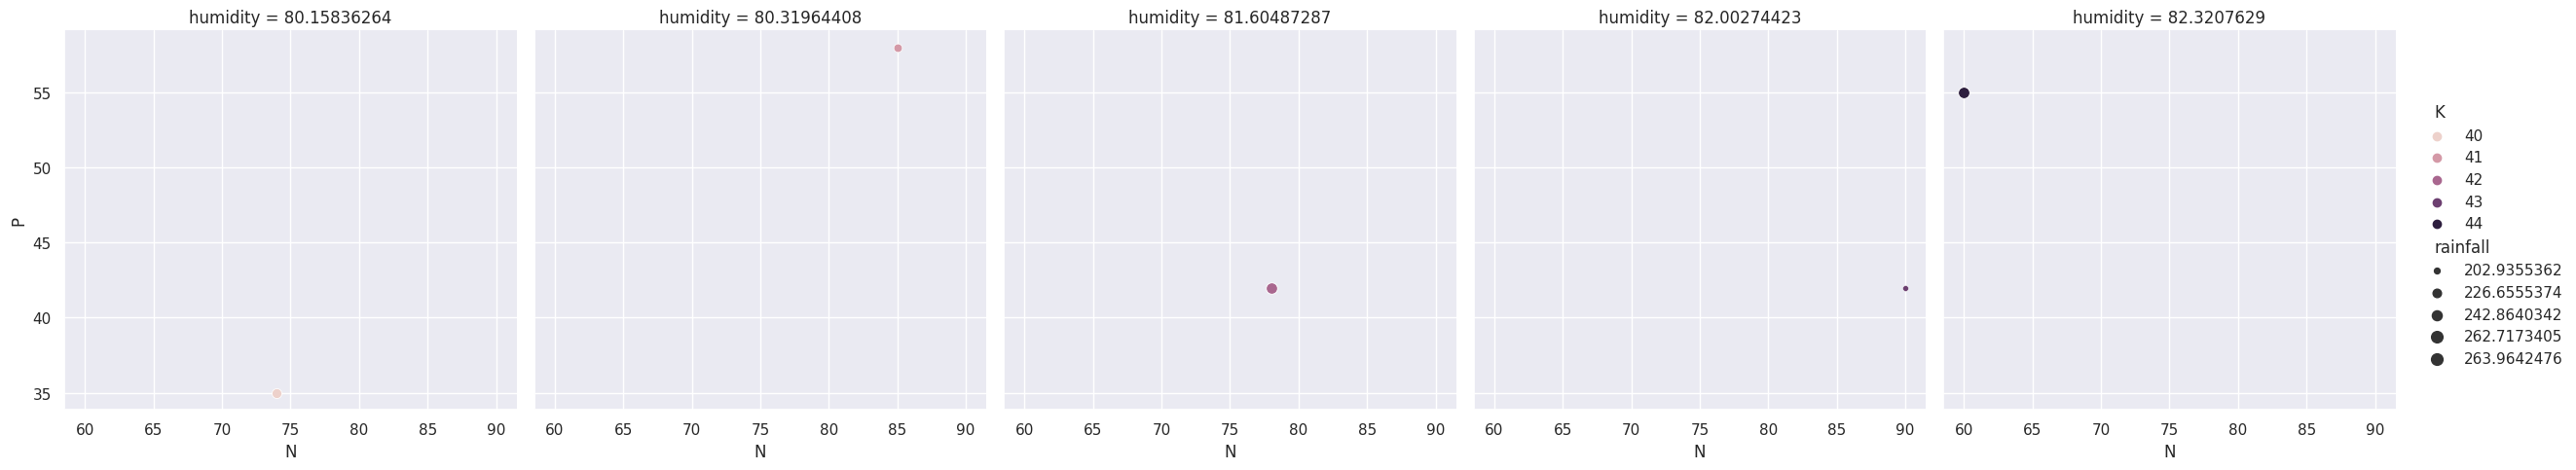

In [ ]:
sns.set()
sns.relplot(x='N', y='P', hue='K', size='rainfall', col='humidity', data=df1)

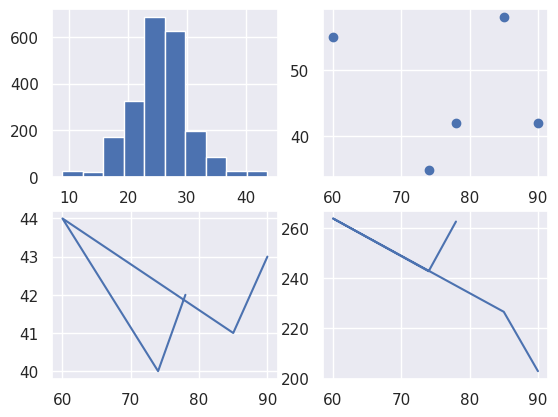

In [ ]:
fig, axes = plt.subplots(2,2)
axes[0, 0].hist(df['temperature'])
axes[0, 1].scatter(fg['N'], fg['P'])
axes[1, 0].plot(fg['N'], fg['K'])
axes[1, 1].plot(fg['N'], fg['rainfall'])

# **DATA PREPROCESSING**

In [ ]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [ ]:
df1=df.head()
print(df1)

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [ ]:
acc = []
model = []

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
dfs[col_names]= scaler.fit_transform(features.values)
print(dfs)

             N         P         K  temperature  humidity        ph  rainfall  \
0     0.642857  0.289655  0.209756     0.478065  0.820176  0.654547  0.679714   
1     0.607143  0.400000  0.200000     0.498459  0.803342  0.708408  0.759162   
2     0.428571  0.379310  0.214634     0.526713  0.823357  0.789143  0.884124   
3     0.528571  0.241379  0.195122     0.606544  0.801729  0.702601  0.813451   
4     0.557143  0.289655  0.204878     0.460903  0.816197  0.767831  0.879948   
...        ...       ...       ...          ...       ...       ...       ...   
2195  0.764286  0.234483  0.156098     0.613036  0.664253  0.682436  0.595440   
2196  0.707143  0.103448  0.131707     0.627746  0.566466  0.612669  0.428472   
2197  0.842857  0.227586  0.146341     0.552525  0.672373  0.640418  0.580529   
2198  0.835714  0.220690  0.165854     0.601537  0.521368  0.680295  0.425962   
2199  0.742857  0.124138  0.146341     0.540418  0.604074  0.682413  0.472056   

      label  
0        20  

In [ ]:
dfs = dft1.copy()
col_names = ['N','P','K','temperature','humidity','ph','rainfall']
features = dfs[col_names]
print(features)

        N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]


# **TRAIN AND TEST**

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [ ]:
print(Xtrain)

        N    P    K  temperature   humidity        ph    rainfall
1936  113   38   25    22.000851  79.472710  7.388266   90.422242
610    28   35   22    29.530376  86.733460  7.156563   59.872321
372    11   61   21    18.623288  23.024103  5.532101  135.337803
1559   29  139  205    23.641424  93.744615  6.155939  116.691218
1500   24  128  196    22.750888  90.694892  5.521467  110.431786
...   ...  ...  ...          ...        ...       ...         ...
1071  105   88   54    25.787498  84.511942  6.020445  114.200546
433    27   71   23    23.453790  46.487148  7.109598  150.871220
674    23   39   22    29.256493  81.979522  6.864839   42.024833
1099  117   81   53    29.507046  78.205856  5.507642   98.125658
1608   39   24   14    30.554726  90.903438  7.189260  106.071198

[1760 rows x 7 columns]


In [ ]:
print(Xtest)

        N   P   K  temperature   humidity        ph    rainfall
2121   83  21  28    25.567483  60.492446  7.466901  190.225784
960     1  27  36    23.985988  93.342366  5.684995  104.991282
952    23   5  44    21.207254  94.263047  7.163005  107.566080
1958  116  52  19    22.942767  75.371706  6.114526   67.080226
681     6  37  17    28.086572  80.350059  6.760694   38.144768
...   ...  ..  ..          ...        ...       ...         ...
1684    7  17  10    10.164313  91.223210  6.465913  106.362551
1477   86  18  45    28.965866  90.718329  6.566759   22.258381
851     6  64  23    23.335652  67.404607  7.065264   36.186787
370    37  56  25    22.055923  19.603793  5.774755  126.726537
2010   89  53  44    24.886928  71.917115  7.319735  150.249867

[440 rows x 7 columns]


In [ ]:
print(Ytrain)

1936         cotton
610        mungbean
372     kidneybeans
1559          apple
1500          apple
           ...     
1071         banana
433      pigeonpeas
674        mungbean
1099         banana
1608         orange
Name: label, Length: 1760, dtype: object


In [ ]:
print(Ytest)

2121         coffee
960     pomegranate
952     pomegranate
1958         cotton
681        mungbean
           ...     
1684         orange
1477      muskmelon
851          lentil
370     kidneybeans
2010           jute
Name: label, Length: 440, dtype: object


# **DECISION TREE CLSSSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
c = DecisionTreeClassifier()
# Train Decision Tree Classifer
c = c.fit(Xtrain,Ytrain)

#Predict the response for test dataset
y_pred = c.predict(Xtest)
print(y_pred)

['coffee' 'pomegranate' 'pomegranate' 'cotton' 'mungbean' 'coffee'
 'watermelon' 'coconut' 'pigeonpeas' 'mango' 'chickpea' 'jute' 'papaya'
 'mothbeans' 'mango' 'maize' 'orange' 'blackgram' 'cotton' 'orange'
 'banana' 'kidneybeans' 'muskmelon' 'banana' 'mango' 'kidneybeans'
 'coconut' 'coconut' 'jute' 'mungbean' 'pomegranate' 'chickpea' 'mungbean'
 'mungbean' 'mothbeans' 'coffee' 'cotton' 'muskmelon' 'blackgram'
 'blackgram' 'papaya' 'pomegranate' 'pomegranate' 'jute' 'mothbeans'
 'pomegranate' 'pomegranate' 'mungbean' 'coffee' 'chickpea' 'coffee'
 'blackgram' 'cotton' 'pigeonpeas' 'cotton' 'lentil' 'mungbean' 'banana'
 'lentil' 'orange' 'rice' 'jute' 'pigeonpeas' 'grapes' 'pigeonpeas'
 'grapes' 'grapes' 'pomegranate' 'coffee' 'maize' 'apple' 'orange'
 'chickpea' 'mango' 'banana' 'maize' 'banana' 'jute' 'pomegranate'
 'mungbean' 'mango' 'banana' 'rice' 'mothbeans' 'banana' 'muskmelon'
 'orange' 'maize' 'maize' 'coconut' 'rice' 'orange' 'mango' 'orange'
 'orange' 'muskmelon' 'banana' 'ma

In [ ]:
print("Accuracy: ",metrics.accuracy_score(Ytest,y_pred))

Accuracy:  0.9840909090909091


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(Ytest,y_pred  )

print("Confusion Matrix:")
print(result)
result1 = classification_report(Ytest,y_pred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(Ytest,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 21  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0

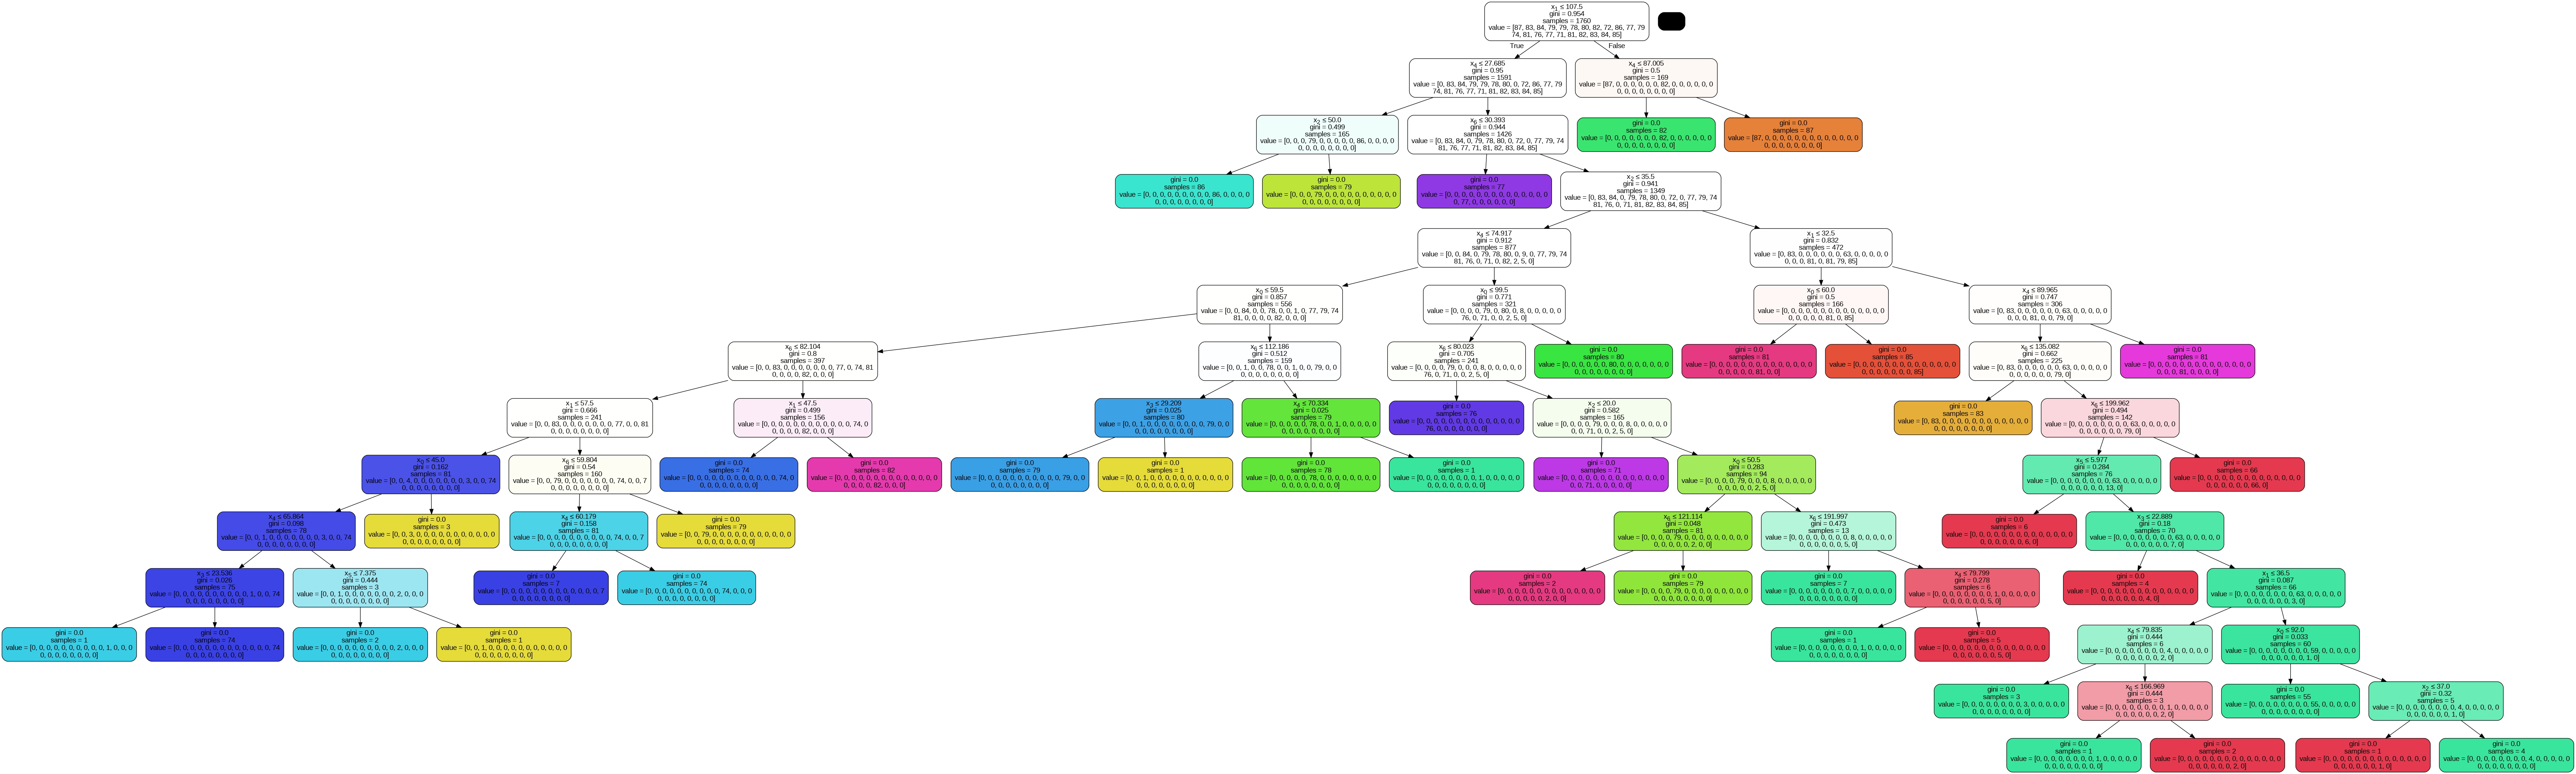

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(c, out_file=dot_data,max_depth=None,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('dtree.png')
Image(graph.create_png())

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(c, features, target,cv=5)
print(score)

[0.99318182 0.98409091 0.99090909 0.98636364 0.98636364]


# **NAVIEBAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [ ]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
print(score)

[0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]


# **SUPPORT VECTOR MACHINE**

In [ ]:
from sklearn.svm import SVC

SVM = SVC(gamma=50)

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.029545454545454545
              precision    recall  f1-score   support

       apple       0.03      1.00      0.06        13
      banana       0.00      0.00      0.00        17
   blackgram       0.00      0.00      0.00        16
    chickpea       0.00      0.00      0.00        21
     coconut       0.00      0.00      0.00        21
      coffee       0.00      0.00      0.00        22
      cotton       0.00      0.00      0.00        20
      grapes       0.00      0.00      0.00        18
        jute       0.00      0.00      0.00        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.00      0.00      0.00        23
       maize       0.00      0.00      0.00        21
       mango       0.00      0.00      0.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       0.00      0.00      0.00        24
   muskmelon       0.00      0.00      0.00        23
      orange       0.00      0.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
score = cross_val_score(SVM,features,target,cv=5)
print(score)

[0.09545455 0.08181818 0.07954545 0.08636364 0.075     ]


# **LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=40, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))



RF's Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      1.00      0.97        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00

In [ ]:
preds = RF.predict(Xtest)
print(preds)

['coffee' 'pomegranate' 'pomegranate' 'cotton' 'mungbean' 'coffee'
 'watermelon' 'coconut' 'pigeonpeas' 'mango' 'chickpea' 'jute' 'papaya'
 'mothbeans' 'mango' 'maize' 'orange' 'blackgram' 'cotton' 'orange'
 'banana' 'kidneybeans' 'muskmelon' 'banana' 'mango' 'kidneybeans'
 'coconut' 'coconut' 'jute' 'mungbean' 'pomegranate' 'chickpea' 'mungbean'
 'mungbean' 'mothbeans' 'coffee' 'cotton' 'muskmelon' 'blackgram'
 'blackgram' 'papaya' 'pomegranate' 'pomegranate' 'jute' 'mothbeans'
 'pomegranate' 'pomegranate' 'mungbean' 'coffee' 'chickpea' 'coffee'
 'blackgram' 'cotton' 'pigeonpeas' 'cotton' 'lentil' 'mungbean' 'banana'
 'lentil' 'orange' 'jute' 'jute' 'pigeonpeas' 'grapes' 'pigeonpeas'
 'grapes' 'grapes' 'pomegranate' 'coffee' 'maize' 'apple' 'orange'
 'chickpea' 'mango' 'banana' 'maize' 'banana' 'jute' 'pomegranate'
 'mungbean' 'mango' 'banana' 'rice' 'mothbeans' 'banana' 'muskmelon'
 'orange' 'maize' 'maize' 'coconut' 'rice' 'orange' 'mango' 'orange'
 'orange' 'muskmelon' 'banana' 'ma

In [ ]:
score = cross_val_score(RF,features,target,cv=5)
print(score)

[0.99545455 0.99090909 0.99772727 0.99318182 0.98636364]


# **XG BOOST**

In [ ]:
X= dfs.iloc[:,[0,1,2,3,4,5,6]].values
y= dfs.iloc[:,-1].values
print(X)
print(y)

[[ 90.          42.          43.         ...  82.00274423   6.50298529
  202.9355362 ]
 [ 85.          58.          41.         ...  80.31964408   7.03809636
  226.6555374 ]
 [ 60.          55.          44.         ...  82.3207629    7.84020714
  263.9642476 ]
 ...
 [118.          33.          30.         ...  67.22512329   6.36260785
  173.3228386 ]
 [117.          32.          34.         ...  52.12739421   6.75879255
  127.1752928 ]
 [104.          18.          30.         ...  60.39647474   6.77983261
  140.9370415 ]]
[20 20 20 ...  5  5  5]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)
y_test_size = y_test.size
y_train_size = y_train.size
print(y_test_size)
print(y_train_size)

660
1540


In [ ]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train,y_train)

predicted_values = XB.predict(X_test)
result = confusion_matrix(y_test,predicted_values)
print("Confusion Matrix:")
print(result)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Confusion Matrix:
[[28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 28  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 21  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0 35  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0

# **PERFORMANCE METRICS**

<Axes: title={'center': 'COMPARISION OF ALGORITHMS'}, xlabel='Accuracy', ylabel='Algorithm'>

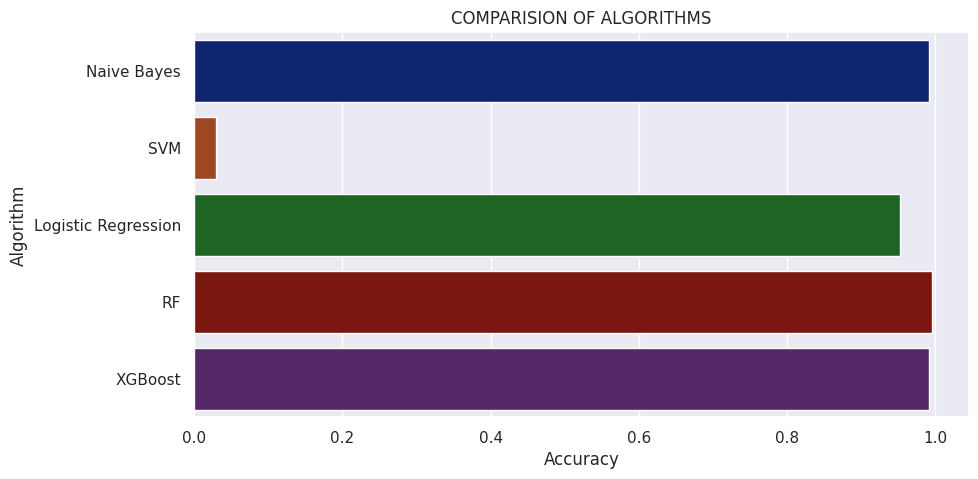

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('COMPARISION OF ALGORITHMS')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [ ]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Naive Bayes --> 0.990909090909091
SVM --> 0.029545454545454545
Logistic Regression --> 0.9522727272727273
RF --> 0.9954545454545455
XGBoost --> 0.990909090909091


# **VALIDATION**

In [ ]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
data = np.array([[87, 25, 40, 38, 75.3, 4.0, 157.9]])
prediction = RF.predict(data)
print(prediction)

['jute']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
